 ## **HOMEWORK 4**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [11v]

In the next exercise you will use the accounts.csv dataset. This dataset contains account details of bank clients, and the target variable yis binary (‘has the client subscribed a term deposit?’). Select the first 8 features and remove duplicates and null values.
<br>

**1.** Normalize the data using MinMaxScaler: <br> <br>
**a.** [4v] Using sklearn, apply k-means clustering (without targets) on the normalized data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.

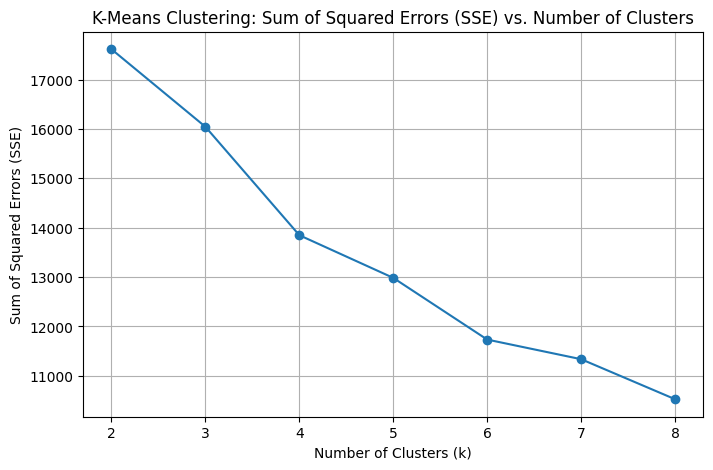

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('accounts.csv')

data = data.iloc[:, :8]

data = data.drop_duplicates()
data = data.dropna()

data = pd.get_dummies(data, drop_first=True)

scaler = MinMaxScaler()
data_scaled_minMax = scaler.fit_transform(data)

k_values = [2, 3, 4, 5, 6, 7, 8]

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_scaled_minMax)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('K-Means Clustering: Sum of Squared Errors (SSE) vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


**b.** [1.5v] According to the previous plot, how many underlying customer segments (clusters) should there be? Explain based on the trade-off between the clusters and inertia.

De k=2 a k=4, o aumento do número de clusters provoca uma diminuição drástica do SSE, o que indica que o aumento de clusters reduz significativamente a variância dentro de um cluster, tal sugere que o aumento de número de clusters melhora o modelo.

Para valores de k maiores que 4, a descida já não é tão acentuada, o que mostra que adicionar mais clusters não vai ter tanta influência na redução de SSE e na melhoria do modelo.

Esta análise mostra-nos que o valor ideal de clusters seria 4, o que permitiria um equilíbrio entre a exatidão e a complexidade do modelo - aumentar o número de clusters poderia levar a overfitting enquanto que diminuir poderia levar a falhas na captação do agrupamento natural dos data points.

**c.** [1.5v] Would k-modes be a better clustering approach? Explain why based on the dataset features

K-modes não seria um melhor modelo pois atua melhor com categorical data (a sua medida de distância é melhor para categorical data) e não trabalha tão bem como dados numéricos uma vez que não usa a média nem distâncias apropriadas para valores contínuos.

**2.** Normalize the data using StandardScaler: <br> <br>
**a.** [1v] Apply PCA to the data. How much variability is explained by the top 2 components?

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)

pca = PCA(n_components=8)
pca.fit(data_scaled_standard)

explained_variance_top_2 = pca.explained_variance_ratio_[:2].sum()

print(f"Variability explained by the top 2 components: {explained_variance_top_2:.2%}")

Variability explained by the top 2 components: 22.76%


**b.** [1v] Apply k-means clustering with k=3 and random_state=42 (all other arguments as default) and use the original 8 features. Next, provide a scatterplot according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

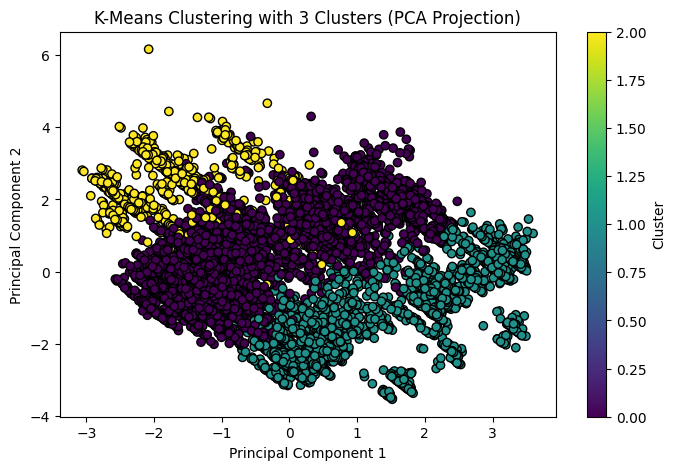

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled_standard)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_standard)

plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 3 Clusters (PCA Projection)')
plt.colorbar(label='Cluster')
plt.show()

Não podemos separar claramente os clusters uma vez que ocorre sobreposição entre o Cluster 0 (roxo) e o Cluster 1 (verde). Também o Cluster 2 (amarelo) possui certos pontos misturados com o Cluster 0. Por outro lado, a grande densidade de pontos em certas áreas torna difícil fazer uma separação evidente e assim os clusters não formam regiões claramente distintas, o que sugere que o método de clustering usado pode não ter captado completamente segmentos distintos dos dados e que poderá não ter sido a melhor escolha para os mesmos.

**c.** [2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to the clusters obtained in the previous question (2b.). Use sns.distplot (see Data Exploration notebook),with multiple="dodge",stat='density', shrink=0.8 and common_norm=False. Describe the main differences between the clusters in no more than half a page.

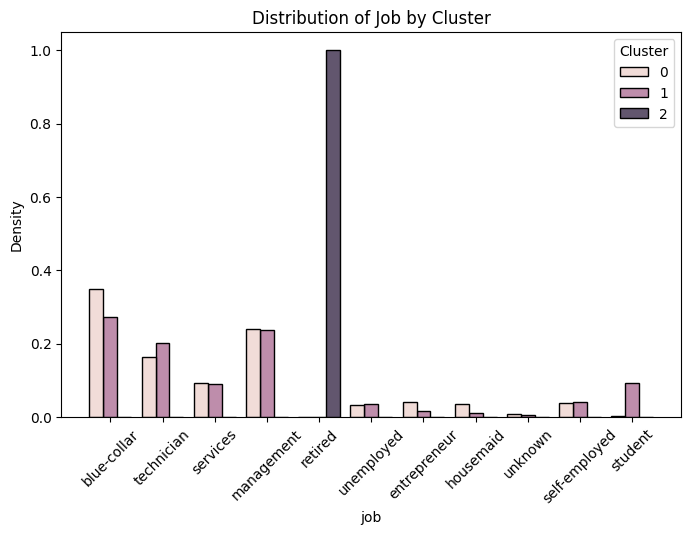

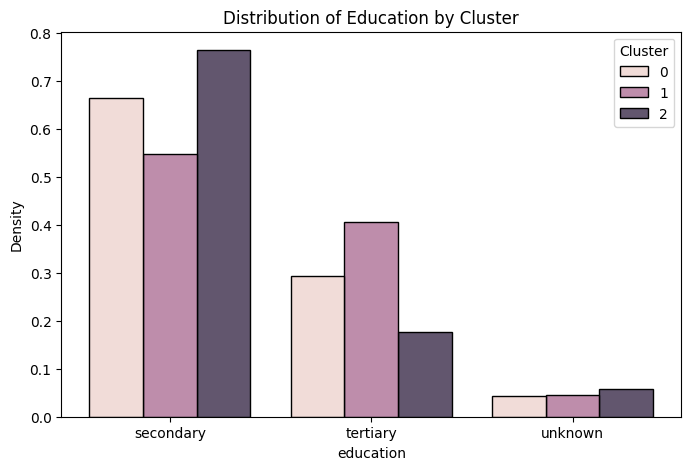

In [19]:
import seaborn as sns

job_columns = [col for col in data.columns if col.startswith('job_')]
education_columns = [col for col in data.columns if col.startswith('education_')]

data['job'] = data[job_columns].idxmax(axis=1).str.replace('job_', '')
data['education'] = data[education_columns].idxmax(axis=1).str.replace('education_', '')

plt.figure(figsize=(8, 5))
sns.histplot(data, x="job", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Distribution of Job by Cluster")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data, x="education", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Distribution of Education by Cluster")
plt.show()

O **Cluster 0** é constituído maioritariamente por clientes de áreas técnicas/manuais (“blue-collar”, “management”, “technician”) com formação no ensino secundário. Adicionalmente, também é possível afirmar que há uma pequena fração representativa nas funções de “services”. No que diz respeito ao ensino, existe uma percentagem mais baixa com “tertiary education” e representação mínima para educação “unknown”. 

Já o **Cluster 1** apresenta maior diversidade nos cargos que os clientes tomam e uma percentagem mais equilíbrada no ensino secundário e superior, tendo, por isso, um grupo demográfico mais abrangente. Tal como o Cluster 0, as funções de “blue-collar”, “technician” e “management” são proeminentes, havendo também uma presença significativa de  clientes estudantes e desempregados. Para além disso, o Cluster tem um mix mais diversificado em termos de nível de ensino, incluindo clientes com ensino secundário e ensino superior. 

O **Cluster 2** é dominado por reformados, maioritariamente com ensino secundário. Tal sugere que é um grupo demográfico mais idoso e, tendo muita pouca representação noutras categorias profissionais, é possível que o cluster seja composto quase exclusivamente por reformados. Em termos de escolaridade, podemos dizer que há uma elevada proporção de clientes com ensino secundário e uma menor proporção com ensino superior e escolaridade desconhecida. 
